In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
url="https://results.eci.gov.in/PcResultGenJune2024/index.htm"

page = requests.get(url)
soup = BeautifulSoup(page.text,"html.parser")

soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_con

In [6]:
table = soup.find('table', class_='table')

heads = table.find('thead')
headr = heads.find_all('th')
header = [th.text.strip() for th in headr]

foots = table.find('tfoot')
footr = foots.find_all('th')
footer = [th.text.strip() for th in footr]

In [7]:
table = soup.find("tbody")
rows = table.find_all("tr")

In [8]:
party_name = []
won_seats = []
leading_seats = []
total_seats = []
party_abb=[]

In [9]:
#Testing

row = rows[6]
tds = row.find_all("td")
print(" ".join(tds[0].text.strip().split()[:-2]))
print(tds[1].text.strip())
print(tds[2].text.strip())
print(tds[3].text.strip())

row.find("a")['href']

Janata Dal (United)
12
0
12


'partywisewinresultState-805.htm'

In [10]:
for row in rows:
    cols = row.find_all('td')
    party_name.append(" ".join(cols[0].text.strip().split()[:-2]))
    won_seats.append(cols[1].text.strip())
    leading_seats.append(cols[2].text.strip())
    total_seats.append(cols[3].text.strip())   
    party_abb.append(cols[0].text.strip().split()[-1])

In [11]:
party_results = pd.DataFrame({
    'Party': party_name,
    'Party Abbreviation': party_abb,
    'Won': won_seats,
    'Leading': leading_seats,
    'Total': total_seats
})

In [12]:
party_results

,Party,Party Abbreviation,Won,Leading,Total
0,Bharatiya Janata Party,BJP,240,0,240
1,Indian National Congress,INC,99,0,99
2,Samajwadi Party,SP,37,0,37
3,All India Trinamool Congress,AITC,29,0,29
4,Dravida Munnetra Kazhagam,DMK,22,0,22
5,Telugu Desam,TDP,16,0,16
6,Janata Dal (United),JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey),SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Pawar,NCPSP,8,0,8
9,Shiv Sena,SHS,7,0,7


In [13]:
party_results["Total"] = party_results["Total"].astype('Int64')
party_results["Won"] = party_results["Won"].astype('Int64')
party_results["Leading"] = party_results["Leading"].astype('Int64')
party_results.dtypes


Party                 object
Party Abbreviation    object
Won                    Int64
Leading                Int64
Total                  Int64
dtype: object

In [14]:
import matplotlib.pyplot as plt


N = 8  # Number of top parties to show individually
top_parties = party_results.head(N)
others = pd.DataFrame({
    'Party': ['Others'],
    'Party Abbreviation': "Others",
    'Won': [party_results.iloc[N:]['Won'].sum()],
    'Leading': [party_results.iloc[N:]['Leading'].sum()],
    'Total': [party_results.iloc[N:]['Total'].sum()]
})
df_plot = pd.concat([top_parties, others])


In [15]:
others

,Party,Party Abbreviation,Won,Leading,Total
0,Others,Others,79,0,79


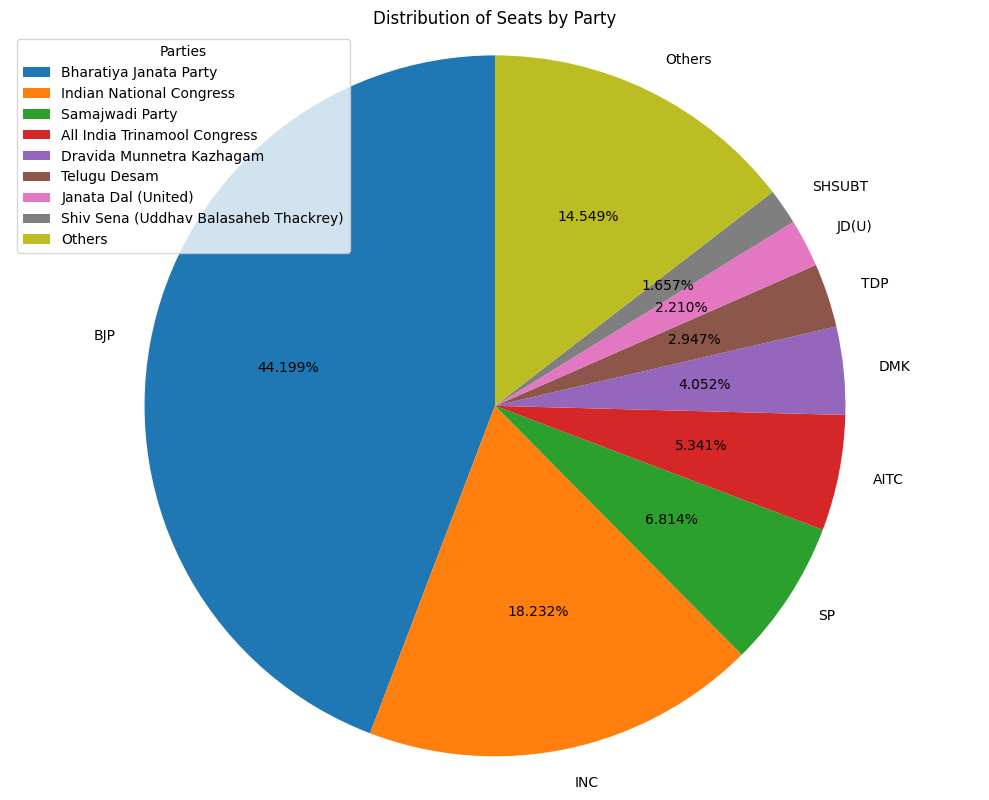

In [202]:
plt.figure(figsize=(10,8))
plt.pie(df_plot["Won"],labels=df_plot['Party Abbreviation'],autopct='%1.3f%%', startangle=90)
plt.title('Distribution of Seats by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(df_plot['Party'], title="Parties",loc='upper left')

plt.tight_layout()
plt.show()

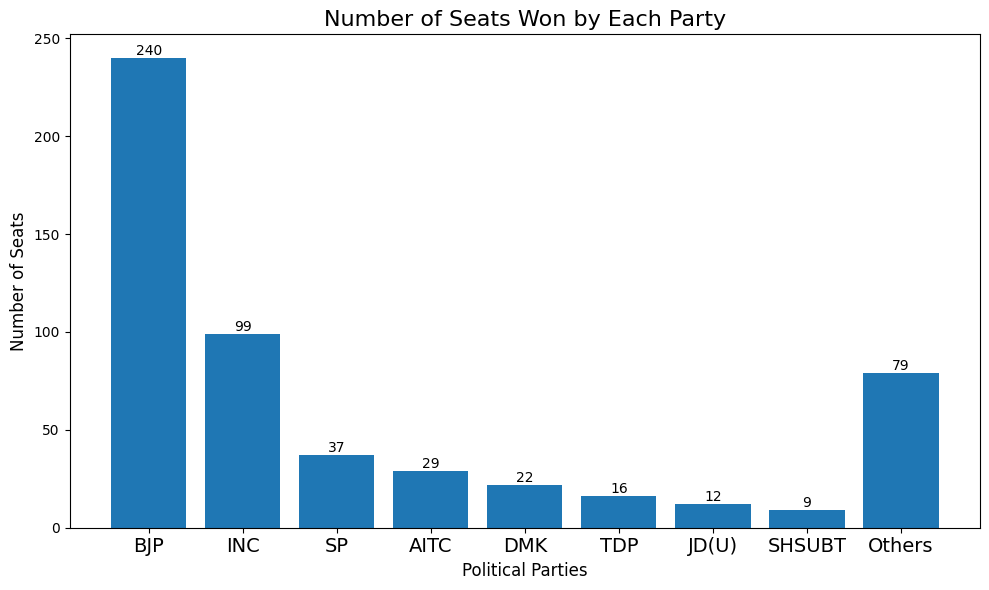

In [205]:
import numpy as np
plt.figure(figsize=(10,6))
bars = plt.bar(df_plot['Party'], df_plot['Won'])

# Customize the chart
plt.title('Number of Seats Won by Each Party', fontsize=16)
plt.xlabel('Political Parties', fontsize=12)
plt.ylabel('Number of Seats', fontsize=12)
plt.xticks(np.arange(df_plot.shape[0]),df_plot["Party Abbreviation"],fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

Statewise Results

In [18]:
state_wise_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-"

all_state_soup = soup.find("div",class_="flter-btns").find_all("option")[1:]
state_code=[]
states = []
states_urls=[]
for option in all_state_soup:
    states.append(option.text.strip())
    state_code.append(option['value'])
    states_urls.append(state_wise_url+option['value']+".htm")
'''print(states)
print(state_code)
print(states_urls)'''

all_states = pd.DataFrame(list(zip(states,state_code,states_urls)),columns=['States','Code','URL'])

all_states.head()

,States,Code,URL
0,Andaman & Nicobar Islands,U01,https://results.eci.gov.in/PcResultGenJune2024...
1,Andhra Pradesh,S01,https://results.eci.gov.in/PcResultGenJune2024...
2,Arunachal Pradesh,S02,https://results.eci.gov.in/PcResultGenJune2024...
3,Assam,S03,https://results.eci.gov.in/PcResultGenJune2024...
4,Bihar,S04,https://results.eci.gov.in/PcResultGenJune2024...


In [19]:
andhra = pd.read_html(all_states['URL'].iloc[1])[0]
print(andhra.dtypes)

Party      object
Won         int64
Leading     int64
Total       int64
dtype: object


In [20]:
#getting state wise information
state_results = {}

for i in range(len(state_code)):
    url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-" + state_code[i] + ".htm"
    df = pd.read_html(url)[0]
    info = {}
    for j in range(df.shape[0]):
        if j >= 3:
            break
        if df['Party'][j] == "Total":
            continue
        info[df['Party'][j]] = df['Won'][j]
    state_results[states[i]] = info

state_results

{'Andaman & Nicobar Islands': {'Bharatiya Janata Party - BJP': 1},
 'Andhra Pradesh': {'Telugu Desam - TDP': 16,
  'Yuvajana Sramika Rythu Congress Party - YSRCP': 4,
  'Bharatiya Janata Party - BJP': 3},
 'Arunachal Pradesh': {'Bharatiya Janata Party - BJP': 2},
 'Assam': {'Bharatiya Janata Party - BJP': 9,
  'Indian National Congress - INC': 3,
  'United People’s Party, Liberal - UPPL': 1},
 'Bihar': {'Janata Dal (United) - JD(U)': 12,
  'Bharatiya Janata Party - BJP': 12,
  'Lok Janshakti Party(Ram Vilas) - LJPRV': 5},
 'Chandigarh': {'Indian National Congress - INC': 1},
 'Chhattisgarh': {'Bharatiya Janata Party - BJP': 10,
  'Indian National Congress - INC': 1},
 'Dadra & Nagar Haveli and Daman & Diu': {'Bharatiya Janata Party - BJP': 1,
  'Independent - IND': 1},
 'Goa': {'Bharatiya Janata Party - BJP': 1,
  'Indian National Congress - INC': 1},
 'Gujarat': {'Bharatiya Janata Party - BJP': 25,
  'Indian National Congress - INC': 1},
 'Haryana': {'Indian National Congress - INC': 

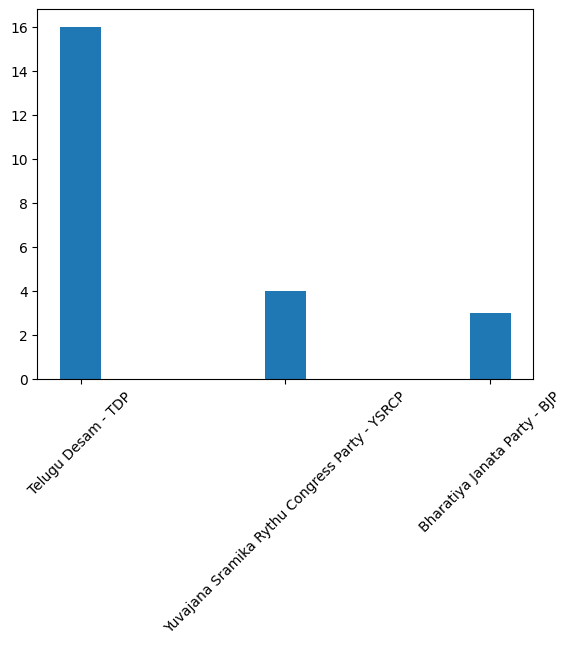

In [21]:
bar_width = 0.2
def plotPartiesStateWise(state):
    top_three_parties = list(state_results[state].keys())
    votes = list(state_results[state].values())
    plt.bar(top_three_parties , votes , width=bar_width)
    plt.xticks(rotation=45)
    plt.show()

plotPartiesStateWise("Andhra Pradesh")

In [22]:
def prepare_election_data(original_data):
    election_data = {}
    
    for state, parties in original_data.items():
        if parties:  # Check if the state has any party data
            winning_party = max(parties, key=parties.get)
            # Extract just the party name without the full description
            winning_party_short = winning_party.split(' - ')[0]
            election_data[state] = winning_party_short
    
    return election_data

In [77]:
import geopandas as gpd

india_map = gpd.read_file("C:/Users/marve/Documents/GitHub/2024-Indian-G-Elections-Scraper/Maps_with_python-master/india-polygon.shp")

election_data = prepare_election_data(state_results)

election_data

{'Andaman & Nicobar Islands': 'Bharatiya Janata Party',
 'Andhra Pradesh': 'Telugu Desam',
 'Arunachal Pradesh': 'Bharatiya Janata Party',
 'Assam': 'Bharatiya Janata Party',
 'Bihar': 'Janata Dal (United)',
 'Chandigarh': 'Indian National Congress',
 'Chhattisgarh': 'Bharatiya Janata Party',
 'Dadra & Nagar Haveli and Daman & Diu': 'Bharatiya Janata Party',
 'Goa': 'Bharatiya Janata Party',
 'Gujarat': 'Bharatiya Janata Party',
 'Haryana': 'Indian National Congress',
 'Himachal Pradesh': 'Bharatiya Janata Party',
 'Jammu and Kashmir': 'Jammu & Kashmir National Conference',
 'Jharkhand': 'Bharatiya Janata Party',
 'Karnataka': 'Bharatiya Janata Party',
 'Kerala': 'Indian National Congress',
 'Ladakh': 'Independent',
 'Lakshadweep': 'Indian National Congress',
 'Madhya Pradesh': 'Bharatiya Janata Party',
 'Maharashtra': 'Indian National Congress',
 'Manipur': 'Indian National Congress',
 'Meghalaya': 'Voice of the People Party',
 'Mizoram': 'Zoram People’s Movement',
 'Nagaland': 'India

In [116]:
winning_parties = list(set(election_data.values()))

color_map = {
    'Bharatiya Janata Party': '#FFA500',  # Saffron
    'Indian National Congress': '#00FF00',  # Green
    'All India Trinamool Congress': '#00FFFF',  # Cyan
    'Samajwadi Party': '#FF0000',  # Red
    'Dravida Munnetra Kazhagam': '#E9C100'  # Yellow
}

C:\Users\marve\AppData\Local\Temp\ipykernel_8148\3086187813.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  india_map.plot(column='Winning_Party', ax=ax, legend=True,color=india_map['Party_Color'])


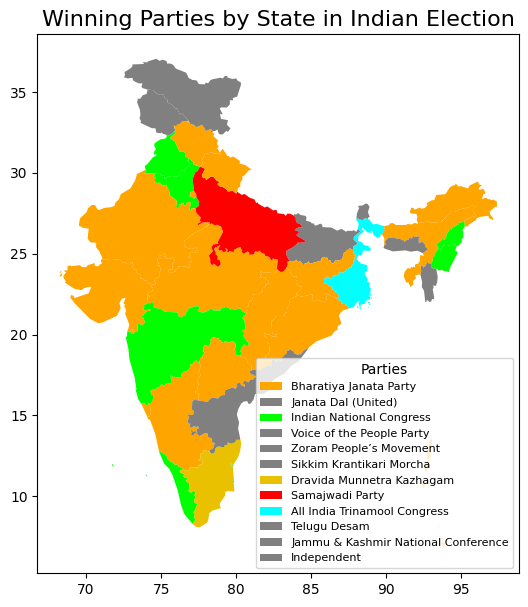

In [117]:
import matplotlib.patches as mpatches
# Create a mapping dictionary to standardize names
name_mapping = {
    'Andaman and Nicobar Islands': 'Andaman & Nicobar Islands',
    'Dadra and Nagar Haveli': 'Dadra & Nagar Haveli and Daman & Diu',
    'Daman and Diu': 'Dadra & Nagar Haveli and Daman & Diu',
    'Delhi': 'NCT OF Delhi',
    # Add any other necessary mappings
}

# Apply the mapping to the shapefile
india_map['st_nm'] = india_map['st_nm'].map(lambda x: name_mapping.get(x, x))

# For Dadra & Nagar Haveli and Daman & Diu, we need to handle it specially
# as it's two separate entities in the shapefile but one in the election data
dnhdd_party = election_data['Dadra & Nagar Haveli and Daman & Diu']

# Add the election data to the GeoDataFrame
india_map['Winning_Party'] = india_map['st_nm'].map(election_data)

# Add the color information to the GeoDataFrame
india_map['Party_Color'] = india_map['Winning_Party'].apply(lambda x: color_map.get(x,'#808080'))

# Handle the special case for Dadra & Nagar Haveli and Daman & Diu
india_map.loc[india_map['st_nm'] == 'Dadra & Nagar Haveli and Daman & Diu', 'Winning_Party'] = dnhdd_party

# Plot the map
fig, ax = plt.subplots(figsize=(7,7))
india_map.plot(column='Winning_Party', ax=ax, legend=True,color=india_map['Party_Color'])

# Create a custom legend
unique_parties = india_map['Winning_Party'].unique()
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color_map.get(party, '#808080'), edgecolor='none') for party in unique_parties]

# Add the legend to the plot
plt.legend(legend_elements, unique_parties, title='Parties', 
           loc='lower right',prop={'size': 8})

plt.title('Winning Parties by State in Indian Election', fontsize=16)
plt.show()

In [134]:
state_results

{'Andaman & Nicobar Islands': {'Bharatiya Janata Party - BJP': 1},
 'Andhra Pradesh': {'Telugu Desam - TDP': 16,
  'Yuvajana Sramika Rythu Congress Party - YSRCP': 4,
  'Bharatiya Janata Party - BJP': 3},
 'Arunachal Pradesh': {'Bharatiya Janata Party - BJP': 2},
 'Assam': {'Bharatiya Janata Party - BJP': 9,
  'Indian National Congress - INC': 3,
  'United People’s Party, Liberal - UPPL': 1},
 'Bihar': {'Janata Dal (United) - JD(U)': 12,
  'Bharatiya Janata Party - BJP': 12,
  'Lok Janshakti Party(Ram Vilas) - LJPRV': 5},
 'Chandigarh': {'Indian National Congress - INC': 1},
 'Chhattisgarh': {'Bharatiya Janata Party - BJP': 10,
  'Indian National Congress - INC': 1},
 'Dadra & Nagar Haveli and Daman & Diu': {'Bharatiya Janata Party - BJP': 1,
  'Independent - IND': 1},
 'Goa': {'Bharatiya Janata Party - BJP': 1,
  'Indian National Congress - INC': 1},
 'Gujarat': {'Bharatiya Janata Party - BJP': 25,
  'Indian National Congress - INC': 1},
 'Haryana': {'Indian National Congress - INC': 

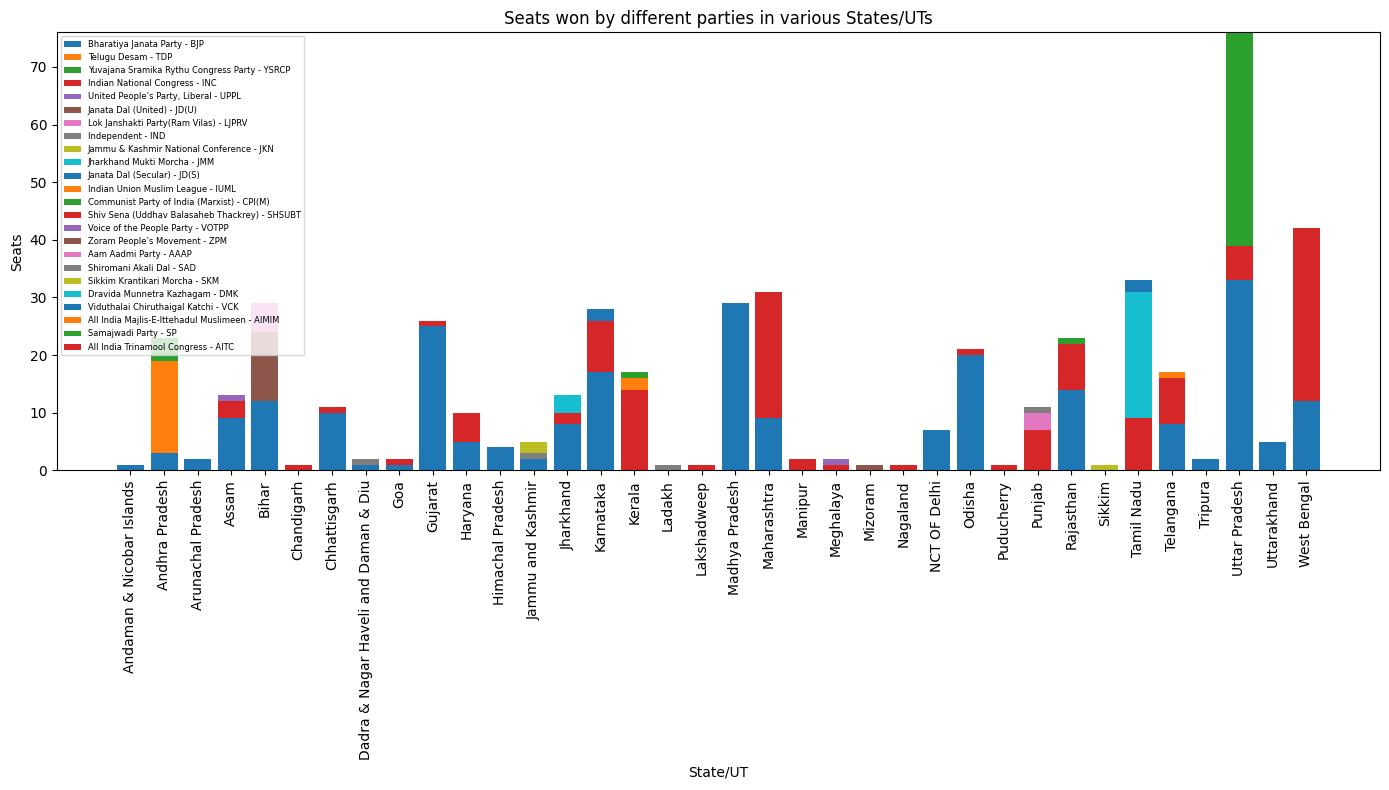

In [160]:
def plot_by_state(df):

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 8))

    # Define the position of the bars
    positions = np.arange(len(df))

    # Initialize the bottom position for each state/UT to zero
    bottom = np.zeros(len(df))

    # Plot each party
    for party in df.columns:
        ax.bar(positions, df[party], bottom=bottom, label=party)
        bottom += df[party]

    # Add labels, title, and legend
    ax.set_xlabel('State/UT')
    ax.set_ylabel('Seats')
    ax.set_xticks(positions)
    ax.set_xticklabels(df.index, rotation=90,fontsize=10)
    ax.set_title('Seats won by different parties in various States/UTs')
    ax.legend(loc='upper left',prop={'size': 6})

    plt.tight_layout()
    plt.show()


# Convert the data to a pandas DataFrame
plot_by_state(pd.DataFrame(state_results).T.fillna(0))

In [151]:
state_results.items()

dict_items([('Andaman & Nicobar Islands', {'Bharatiya Janata Party - BJP': 1}), ('Andhra Pradesh', {'Telugu Desam - TDP': 16, 'Yuvajana Sramika Rythu Congress Party - YSRCP': 4, 'Bharatiya Janata Party - BJP': 3}), ('Arunachal Pradesh', {'Bharatiya Janata Party - BJP': 2}), ('Assam', {'Bharatiya Janata Party - BJP': 9, 'Indian National Congress - INC': 3, 'United People’s Party, Liberal - UPPL': 1}), ('Bihar', {'Janata Dal (United) - JD(U)': 12, 'Bharatiya Janata Party - BJP': 12, 'Lok Janshakti Party(Ram Vilas) - LJPRV': 5}), ('Chandigarh', {'Indian National Congress - INC': 1}), ('Chhattisgarh', {'Bharatiya Janata Party - BJP': 10, 'Indian National Congress - INC': 1}), ('Dadra & Nagar Haveli and Daman & Diu', {'Bharatiya Janata Party - BJP': 1, 'Independent - IND': 1}), ('Goa', {'Bharatiya Janata Party - BJP': 1, 'Indian National Congress - INC': 1}), ('Gujarat', {'Bharatiya Janata Party - BJP': 25, 'Indian National Congress - INC': 1}), ('Haryana', {'Indian National Congress - INC'

In [162]:
def find_close_margins(data, threshold=3):
    close_margins = {}
    for state, results in data.items():
        sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
        if len(sorted_results) > 1 and abs(sorted_results[0][1] - sorted_results[1][1]) <= threshold:
            close_margins[state] = sorted_results
    return close_margins

# Get states with close margins
close_margins = find_close_margins(state_results)

# Print the states with close margins
print("States with close margins:")
for state, results in close_margins.items():
    print(f"{state}:")
    for party, margin in results:
        print(f"{party}: {margin}")
    print("----")


States with close margins:
Bihar:
Janata Dal (United) - JD(U): 12
Bharatiya Janata Party - BJP: 12
Lok Janshakti Party(Ram Vilas) - LJPRV: 5
----
Dadra & Nagar Haveli and Daman & Diu:
Bharatiya Janata Party - BJP: 1
Independent - IND: 1
----
Goa:
Bharatiya Janata Party - BJP: 1
Indian National Congress - INC: 1
----
Haryana:
Indian National Congress - INC: 5
Bharatiya Janata Party - BJP: 5
----
Jammu and Kashmir:
Jammu & Kashmir National Conference - JKN: 2
Bharatiya Janata Party - BJP: 2
Independent - IND: 1
----
Meghalaya:
Voice of the People Party - VOTPP: 1
Indian National Congress - INC: 1
----
Telangana:
Bharatiya Janata Party - BJP: 8
Indian National Congress - INC: 8
All India Majlis-E-Ittehadul Muslimeen - AIMIM: 1
----


In [186]:
close_margins

{'Bihar': [('Janata Dal (United) - JD(U)', 12),
  ('Bharatiya Janata Party - BJP', 12),
  ('Lok Janshakti Party(Ram Vilas) - LJPRV', 5)],
 'Dadra & Nagar Haveli and Daman & Diu': [('Bharatiya Janata Party - BJP', 1),
  ('Independent - IND', 1)],
 'Goa': [('Bharatiya Janata Party - BJP', 1),
  ('Indian National Congress - INC', 1)],
 'Haryana': [('Indian National Congress - INC', 5),
  ('Bharatiya Janata Party - BJP', 5)],
 'Jammu and Kashmir': [('Jammu & Kashmir National Conference - JKN', 2),
  ('Bharatiya Janata Party - BJP', 2),
  ('Independent - IND', 1)],
 'Meghalaya': [('Voice of the People Party - VOTPP', 1),
  ('Indian National Congress - INC', 1)],
 'Telangana': [('Bharatiya Janata Party - BJP', 8),
  ('Indian National Congress - INC', 8),
  ('All India Majlis-E-Ittehadul Muslimeen - AIMIM', 1)]}

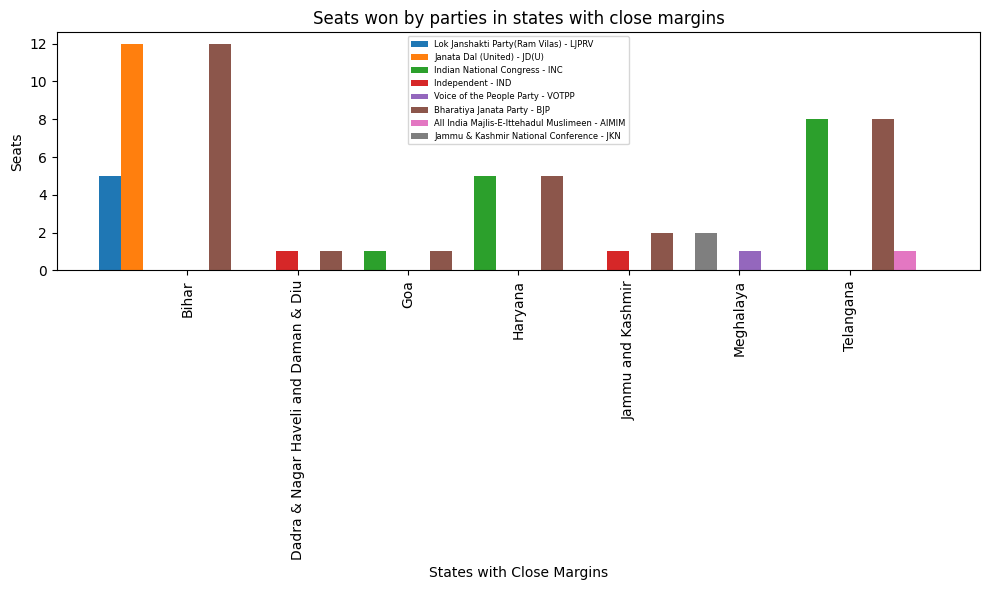

In [201]:
# Extract parties for the legend
parties = set()
for state in close_margins:
    for party, seats in close_margins[state]:
        parties.add(party)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the number of states and width for each group
num_states = len(close_margins)
bar_width = 0.2
index = np.arange(num_states)

# Plot each party's seats for each state
for i, party in enumerate(parties):
    party_values = [next((seats for p, seats in close_margins[state] if p == party), 0) for state in close_margins]
    #print(party_values)
    ax.bar(index + i * bar_width, party_values, bar_width, label=party)

# Add labels, title, and legend
ax.set_xlabel('States with Close Margins')
ax.set_ylabel('Seats')
ax.set_title('Seats won by parties in states with close margins')
ax.set_xticks(index + bar_width * (len(parties) - 1) / 2)
ax.set_xticklabels(close_margins.keys(), rotation=90)
ax.legend(loc='upper center',prop={'size': 6})

plt.tight_layout()
plt.show()